# MarketEye

In [92]:
!pip install pmdarima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import pmdarima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima.utils import ndiffs
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Load CSV data into training and test dataframes

In [93]:
csv_location = "./data/MarketEye Data - ALL_Average.csv"
df = pd.read_csv(csv_location)
df

,WeekNum,Cabbage,Carrot,Baguio Beans,Patatas,Pechay Baguio,Chayote,Ampalaya,Sitao,Pechay Tagalog,Squash,Eggplant,Tomato
0,1,115.0,120.0,140.0,80.00,70.00,40.0,80.0,70.0,62.50,40.00,100.00,60.00
1,2,104.0,120.0,120.0,80.00,62.00,40.0,74.0,76.0,60.00,40.00,80.00,60.00
2,3,92.5,140.0,85.0,77.50,60.00,40.0,65.0,77.5,60.00,40.00,60.00,60.00
3,4,86.0,153.0,80.0,78.00,60.00,40.0,60.0,74.0,58.00,40.00,62.00,60.00
4,5,80.0,120.0,80.0,75.00,60.00,40.0,80.0,86.0,60.00,40.00,68.00,60.00
5,6,70.0,96.0,80.0,76.00,59.00,40.0,96.0,100.0,62.00,38.00,91.00,59.00
6,7,80.0,84.0,80.0,75.00,64.00,40.0,100.0,100.0,66.00,38.00,100.00,51.00
7,8,80.0,97.5,80.0,77.50,61.25,45.0,90.0,100.0,66.25,35.00,100.00,60.00
8,9,80.0,100.0,80.0,80.00,60.00,50.0,80.0,94.0,72.00,36.00,78.00,60.00
9,10,80.0,97.5,90.0,80.00,60.00,50.0,95.0,120.0,80.00,40.00,80.00,60.00


In [94]:
training = df.iloc[:26]
test     = df.iloc[26:]

In [95]:
training

,WeekNum,Cabbage,Carrot,Baguio Beans,Patatas,Pechay Baguio,Chayote,Ampalaya,Sitao,Pechay Tagalog,Squash,Eggplant,Tomato
0,1,115.0,120.0,140.0,80.00,70.00,40.0,80.0,70.0,62.50,40.00,100.00,60.00
1,2,104.0,120.0,120.0,80.00,62.00,40.0,74.0,76.0,60.00,40.00,80.00,60.00
2,3,92.5,140.0,85.0,77.50,60.00,40.0,65.0,77.5,60.00,40.00,60.00,60.00
3,4,86.0,153.0,80.0,78.00,60.00,40.0,60.0,74.0,58.00,40.00,62.00,60.00
4,5,80.0,120.0,80.0,75.00,60.00,40.0,80.0,86.0,60.00,40.00,68.00,60.00
5,6,70.0,96.0,80.0,76.00,59.00,40.0,96.0,100.0,62.00,38.00,91.00,59.00
6,7,80.0,84.0,80.0,75.00,64.00,40.0,100.0,100.0,66.00,38.00,100.00,51.00
7,8,80.0,97.5,80.0,77.50,61.25,45.0,90.0,100.0,66.25,35.00,100.00,60.00
8,9,80.0,100.0,80.0,80.00,60.00,50.0,80.0,94.0,72.00,36.00,78.00,60.00
9,10,80.0,97.5,90.0,80.00,60.00,50.0,95.0,120.0,80.00,40.00,80.00,60.00


In [96]:
test

,WeekNum,Cabbage,Carrot,Baguio Beans,Patatas,Pechay Baguio,Chayote,Ampalaya,Sitao,Pechay Tagalog,Squash,Eggplant,Tomato
26,27,81.0,80.0,80.0,68.0,70.0,34.0,98.0,73.0,60.0,50.0,72.0,88.0
27,28,80.0,85.0,80.0,75.0,72.5,35.0,100.0,77.5,60.0,45.0,67.5,97.5
28,29,80.0,80.0,79.0,74.0,72.0,36.0,98.0,79.0,58.0,40.0,62.0,98.0
29,30,72.0,82.0,108.0,76.0,64.0,35.0,100.0,112.0,60.0,40.0,60.0,91.0


### RMSE Calculator

In [97]:
def RMSE(forecast, actual):
  size = len(forecast)
  RMSE = 0
  for i in range(size):
    RMSE += (forecast.iloc[i] - actual.iloc[i])**2
  
  return float(np.sqrt(RMSE/size))

### autoARIMA Code

In [98]:
# Special AUTOARIMA for optimizing RMSE
# Input: The training data and the limitations of the p and q values for ARIMA as n
# Output: The optimal p and q for minimizing RMSE in the model, with the optimal d from ndiffs.
def autoARIMA(training_data, n):
  min_RMSE = max(training_data)
  p_optimal = 0 
  q_optimal = 0
  d = ndiffs(training_data, test = 'kpss', alpha = 0.05)
  for p in range(n + 1):
    for q in range(n + 1):
      # Skip over ARIMA(1, 0), which is the AR model
      if p == 1 and q == 0:
        continue

      # Try-except to determine if the ARIMA model is valid. If valid, fit and determine the RMSE
      try:
        model = ARIMA(training[fixed_query], order=(p,d,q))
        model_fit = model.fit()
        RMSE_train = RMSE(model_fit.predict(0, len(training) - 1), training[fixed_query])
      except:
        continue

      # Compare the RMSE and see if it is minimum. If so, replace previous optimal values.
      print("ARIMA(%d, %d, %d). RMSE = %f"% (p, d, q, RMSE_train))
      if RMSE_train < min_RMSE:
        min_RMSE = RMSE_train
        p_optimal = p
        q_optimal = q

  return [p_optimal, d, q_optimal] # Return calculated values.

### Main Function

In [99]:
def ModelAndForecast(fixed_query):
  # Call the autoARIMA function for the given query.
  p, d, q = autoARIMA(training[fixed_query], 6)
  print("Optimal p: %d\nOptimal d: %d\nOptimal q: %d" % (p, d, q))

  # Create the model for the optmal p d q values and fit
  model = ARIMA(training[fixed_query], order=(p,d,q))
  model_fit = model.fit()

  # Plot the model (in-sample)
  model_plot = model_fit.predict(0, len(training) - 1, typ = 'level')

  # Forecast using the model for the next len(test) (4 in this example) values.
  fc = model_fit.get_forecast(len(test[fixed_query])) 

  # Get the confidence interval at 90%
  conf = fc.conf_int(0.1)

  # Make as pandas series
  fc_series = pd.Series(fc.predicted_mean, index=test.index)
  lower_series = pd.Series(conf["lower "+fixed_query], index=test.index)
  upper_series = pd.Series(conf["upper "+fixed_query], index=test.index)


  # Create the comparison model (AR(1), First-order AutoRegressive Model AKA Random Walk)
  comparison_model = ARIMA(training[fixed_query], order=(1,0,0))
  compared_model_fit = comparison_model.fit()
  compare_fc = compared_model_fit.get_forecast(len(test[fixed_query]))
  conf_2 = compare_fc.conf_int(0.1)
  compare_fc_series = pd.Series(compare_fc.predicted_mean, index=test.index)
  lower_series_2 = pd.Series(conf_2["lower "+fixed_query], index=test.index)
  upper_series_2 = pd.Series(conf_2["upper "+fixed_query], index=test.index)

  # Plot data, model, and forecasts into the diagram.
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(training[fixed_query], label='training')
  plt.plot(test[fixed_query], label='actual')
  plt.plot(fc_series, label='forecast from model')
  plt.plot(compare_fc_series, label='forecast from AR(1)')
  plt.plot(model_plot, label = 'fit from training')
  plt.fill_between(lower_series.index, lower_series, upper_series, 
                  color='k', alpha=.15)
  plt.fill_between(lower_series_2.index, lower_series_2, upper_series_2, 
                  color='k', alpha=.10)
  plt.title('Forecast vs Actuals of ' + fixed_query)
  plt.legend(loc='lower right', fontsize=8)
  plt.show()

  #Performance Checks
  RMSE_train = RMSE(model_plot, training[fixed_query])
  RMSE_test = RMSE(fc.predicted_mean, test[fixed_query])
  NRMSE_test = RMSE_test/np.average(test[fixed_query])
  print("SELECTED MODEL: ARIMA(%d, %d, %d)" % (p,d,q))
  print("=====================================")
  print("RMSE Training:", RMSE_train)
  print("RMSE Test:", RMSE_test)
  print("Normalized RMSE Test:", NRMSE_test)
  print("=====================================")
  mape = np.mean(np.abs(fc.predicted_mean - test[fixed_query])/np.abs(test[fixed_query]))
  print('MAPE:', str(mape))

  RMSE_test = RMSE(compare_fc.predicted_mean, test[fixed_query])
  NRMSE_test = RMSE_test/np.average(test[fixed_query])
  print("\n\nCOMPARED MODEL: ARIMA(1, 0, 0)")
  print("=====================================")
  print("RMSE Test:", RMSE_test)
  print("Normalized RMSE Test:", NRMSE_test)
  print("=====================================")
  mape = np.mean(np.abs(compare_fc.predicted_mean - test[fixed_query])/np.abs(test[fixed_query]))
  print('MAPE:', str(mape))

### ARIMA Modeling (Cabbage)

ARIMA(0, 2, 0). RMSE = 26.883576
ARIMA(0, 2, 1). RMSE = 26.712539
ARIMA(0, 2, 2). RMSE = 26.710444
ARIMA(0, 2, 3). RMSE = 26.709773
ARIMA(0, 2, 4). RMSE = 26.898474


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 5). RMSE = 26.691928


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ARIMA(0, 2, 6). RMSE = nan
ARIMA(1, 2, 1). RMSE = 26.710445
ARIMA(1, 2, 2). RMSE = 26.706935
ARIMA(1, 2, 3). RMSE = 26.710428
ARIMA(1, 2, 4). RMSE = 26.742384
ARIMA(1, 2, 5). RMSE = 26.655057
ARIMA(2, 2, 0). RMSE = 26.706385
ARIMA(2, 2, 1). RMSE = 26.706229
ARIMA(2, 2, 2). RMSE = 26.706784
ARIMA(2, 2, 3). RMSE = 26.683357
ARIMA(2, 2, 4). RMSE = 26.673597
ARIMA(2, 2, 5). RMSE = 26.642070
ARIMA(3, 2, 0). RMSE = 26.706066
ARIMA(3, 2, 1). RMSE = 26.701863


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 2, 2). RMSE = 26.701729
ARIMA(3, 2, 3). RMSE = 26.656949
ARIMA(3, 2, 4). RMSE = 26.670646
ARIMA(3, 2, 5). RMSE = 26.639984
ARIMA(4, 2, 0). RMSE = 26.696612
ARIMA(4, 2, 1). RMSE = 26.687545
ARIMA(4, 2, 2). RMSE = 26.696014
ARIMA(4, 2, 3). RMSE = 26.654570
ARIMA(4, 2, 4). RMSE = 26.656067
ARIMA(4, 2, 5). RMSE = 26.639120
ARIMA(5, 2, 0). RMSE = 26.680415
ARIMA(5, 2, 1). RMSE = 26.677978
ARIMA(5, 2, 2). RMSE = 26.691833
ARIMA(5, 2, 3). RMSE = 26.665460
ARIMA(5, 2, 4). RMSE = 26.637649
ARIMA(5, 2, 5). RMSE = 26.651289
ARIMA(6, 2, 0). RMSE = 26.677171
ARIMA(6, 2, 1). RMSE = 26.676721
ARIMA(6, 2, 2). RMSE = 26.620634
ARIMA(6, 2, 3). RMSE = 26.619088
ARIMA(6, 2, 4). RMSE = 26.619261
ARIMA(6, 2, 5). RMSE = 26.642891
Optimal p: 6
Optimal d: 2
Optimal q: 3


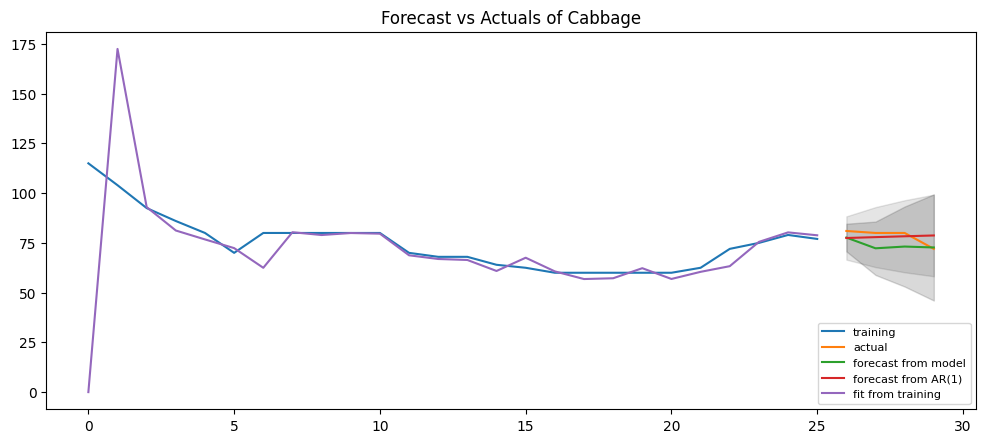

SELECTED MODEL: ARIMA(6, 2, 3)
RMSE Training: 26.61908770634136
RMSE Test: 5.421198415378795
Normalized RMSE Test: 0.06928049093135841
MAPE: 0.05813639707154445


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 4.035318788457066
Normalized RMSE Test: 0.05156956918155995
MAPE: 0.046078526788169115


In [100]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Cabbage"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Carrot)

ARIMA(0, 0, 0). RMSE = 19.279285


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1). RMSE = 13.122098
ARIMA(0, 0, 2). RMSE = 11.591670
ARIMA(0, 0, 3). RMSE = 11.138299
ARIMA(0, 0, 4). RMSE = 11.140529
ARIMA(0, 0, 5). RMSE = 11.037576
ARIMA(0, 0, 6). RMSE = 11.014653
ARIMA(1, 0, 1). RMSE = 11.023358
ARIMA(1, 0, 2). RMSE = 10.995962
ARIMA(1, 0, 3). RMSE = 10.976459
ARIMA(1, 0, 4). RMSE = 11.106462
ARIMA(1, 0, 5). RMSE = 11.089520


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 6). RMSE = 10.695737
ARIMA(2, 0, 0). RMSE = 11.193387
ARIMA(2, 0, 1). RMSE = 11.003600
ARIMA(2, 0, 2). RMSE = 10.993652
ARIMA(2, 0, 3). RMSE = 11.049924
ARIMA(2, 0, 4). RMSE = 10.981083
ARIMA(2, 0, 5). RMSE = 10.838107
ARIMA(2, 0, 6). RMSE = 10.479698
ARIMA(3, 0, 0). RMSE = 10.915728
ARIMA(3, 0, 1). RMSE = 10.915717
ARIMA(3, 0, 2). RMSE = 10.857024
ARIMA(3, 0, 3). RMSE = 10.646383
ARIMA(3, 0, 4). RMSE = 10.873268
ARIMA(3, 0, 5). RMSE = 11.189949
ARIMA(3, 0, 6). RMSE = 10.765714
ARIMA(4, 0, 0). RMSE = 10.915774
ARIMA(4, 0, 1). RMSE = 10.909006
ARIMA(4, 0, 2). RMSE = 10.868317
ARIMA(4, 0, 3). RMSE = 10.708791
ARIMA(4, 0, 4). RMSE = 10.604843
ARIMA(4, 0, 5). RMSE = 10.816258
ARIMA(4, 0, 6). RMSE = 10.647551
ARIMA(5, 0, 0). RMSE = 10.934018
ARIMA(5, 0, 1). RMSE = 10.864597
ARIMA(5, 0, 2). RMSE = 10.795652
ARIMA(5, 0, 3). RMSE = 10.673188
ARIMA(5, 0, 4). RMSE = 10.455909
ARIMA(5, 0, 5). RMSE = 10.600319
ARIMA(5, 0, 6). RMSE = 10.512405
ARIMA(6, 0, 0). RMSE = 10.839554
ARIMA(6, 0

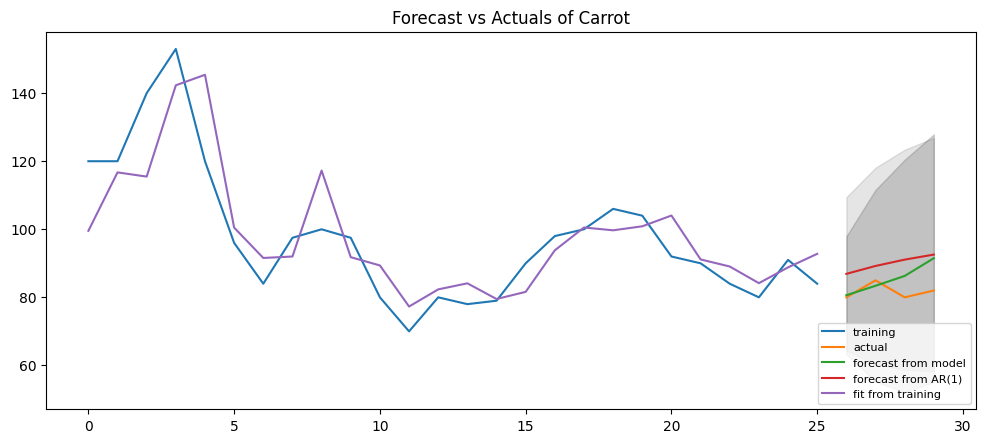

SELECTED MODEL: ARIMA(6, 0, 4)
RMSE Training: 10.416014377753838
RMSE Test: 5.760888103047217
Normalized RMSE Test: 0.0704695792421678
MAPE: 0.05529144198871368


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 8.658149067210251
Normalized RMSE Test: 0.10591008033284711
MAPE: 0.10081966087292496


In [101]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Carrot"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Baguio Beans)

ARIMA(0, 0, 0). RMSE = 14.095668
ARIMA(0, 0, 1). RMSE = 12.202943
ARIMA(0, 0, 2). RMSE = 12.355496
ARIMA(0, 0, 3). RMSE = 12.046593
ARIMA(0, 0, 4). RMSE = 12.124031


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 5). RMSE = 12.449399
ARIMA(0, 0, 6). RMSE = 12.446722
ARIMA(1, 0, 1). RMSE = 12.421103
ARIMA(1, 0, 2). RMSE = 12.220564
ARIMA(1, 0, 3). RMSE = 12.212363
ARIMA(1, 0, 4). RMSE = 12.325255


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 5). RMSE = 12.387073
ARIMA(1, 0, 6). RMSE = 12.366685
ARIMA(2, 0, 0). RMSE = 12.615408
ARIMA(2, 0, 1). RMSE = 12.426758
ARIMA(2, 0, 2). RMSE = 12.690605
ARIMA(2, 0, 3). RMSE = 12.065932
ARIMA(2, 0, 4). RMSE = 12.295619
ARIMA(2, 0, 5). RMSE = 12.483664
ARIMA(2, 0, 6). RMSE = 12.370391
ARIMA(3, 0, 0). RMSE = 12.448693
ARIMA(3, 0, 1). RMSE = 12.439987
ARIMA(3, 0, 2). RMSE = 12.125407
ARIMA(3, 0, 3). RMSE = 12.212858
ARIMA(3, 0, 4). RMSE = 12.288188
ARIMA(3, 0, 5). RMSE = 12.122688
ARIMA(3, 0, 6). RMSE = 12.100862
ARIMA(4, 0, 0). RMSE = 12.517400
ARIMA(4, 0, 1). RMSE = 12.616374
ARIMA(4, 0, 2). RMSE = 12.244581
ARIMA(4, 0, 3). RMSE = 12.456384
ARIMA(4, 0, 4). RMSE = 12.364424
ARIMA(4, 0, 5). RMSE = 12.117832
ARIMA(4, 0, 6). RMSE = 12.340246
ARIMA(5, 0, 0). RMSE = 12.531566
ARIMA(5, 0, 1). RMSE = 12.531401
ARIMA(5, 0, 2). RMSE = 12.601397
ARIMA(5, 0, 3). RMSE = 12.406464
ARIMA(5, 0, 4). RMSE = 12.236494
ARIMA(5, 0, 5). RMSE = 12.147691
ARIMA(5, 0, 6). RMSE = 12.298185
ARIMA(6, 0

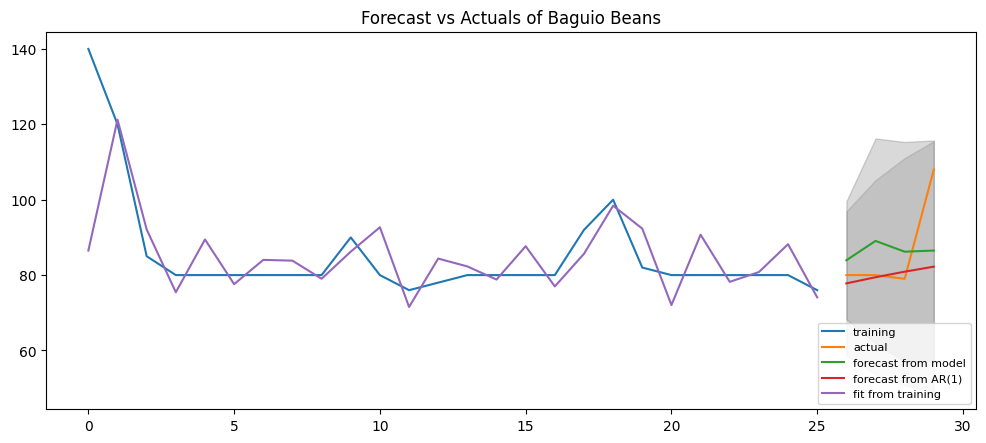

SELECTED MODEL: ARIMA(0, 0, 3)
RMSE Training: 12.04659327396836
RMSE Test: 12.36365478901629
Normalized RMSE Test: 0.1425205162998996
MAPE: 0.1131689818170016


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 12.965063985533968
Normalized RMSE Test: 0.1494531871531293
MAPE: 0.07430839617591829


In [102]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Baguio Beans"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Patatas)

ARIMA(0, 1, 0). RMSE = 16.395236
ARIMA(0, 1, 1). RMSE = 16.343466
ARIMA(0, 1, 2). RMSE = 16.343344
ARIMA(0, 1, 3). RMSE = 16.289915
ARIMA(0, 1, 4). RMSE = 16.289619
ARIMA(0, 1, 5). RMSE = 16.273517
ARIMA(0, 1, 6). RMSE = 16.271880


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1). RMSE = 16.333960
ARIMA(1, 1, 2). RMSE = 16.331337
ARIMA(1, 1, 3). RMSE = 16.289822
ARIMA(1, 1, 4). RMSE = 16.285168
ARIMA(1, 1, 5). RMSE = 16.272919
ARIMA(1, 1, 6). RMSE = 16.273426
ARIMA(2, 1, 0). RMSE = 16.338110
ARIMA(2, 1, 1). RMSE = 16.332675


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 1, 2). RMSE = 16.321914
ARIMA(2, 1, 3). RMSE = 16.271113
ARIMA(2, 1, 4). RMSE = 16.193353
ARIMA(2, 1, 5). RMSE = 16.191805
ARIMA(2, 1, 6). RMSE = 16.395236
ARIMA(3, 1, 0). RMSE = 16.311983
ARIMA(3, 1, 1). RMSE = 16.307904
ARIMA(3, 1, 2). RMSE = 16.202073
ARIMA(3, 1, 3). RMSE = 16.202074
ARIMA(3, 1, 4). RMSE = 16.192183
ARIMA(3, 1, 5). RMSE = 16.192887
ARIMA(3, 1, 6). RMSE = 16.395236
ARIMA(4, 1, 0). RMSE = 16.299313
ARIMA(4, 1, 1). RMSE = 16.296140
ARIMA(4, 1, 2). RMSE = 16.202063
ARIMA(4, 1, 3). RMSE = 16.201764
ARIMA(4, 1, 4). RMSE = 16.203791
ARIMA(4, 1, 5). RMSE = 16.190558
ARIMA(4, 1, 6). RMSE = 16.395236
ARIMA(5, 1, 0). RMSE = 16.282713
ARIMA(5, 1, 1). RMSE = 16.271215
ARIMA(5, 1, 2). RMSE = 16.197564
ARIMA(5, 1, 3). RMSE = 16.201477
ARIMA(5, 1, 4). RMSE = 16.200727
ARIMA(5, 1, 6). RMSE = 16.395236
ARIMA(6, 1, 0). RMSE = 16.235960
ARIMA(6, 1, 1). RMSE = 16.219073
ARIMA(6, 1, 2). RMSE = 16.194922
ARIMA(6, 1, 3). RMSE = 16.190097
ARIMA(6, 1, 4). RMSE = 16.147270
ARIMA(6, 1

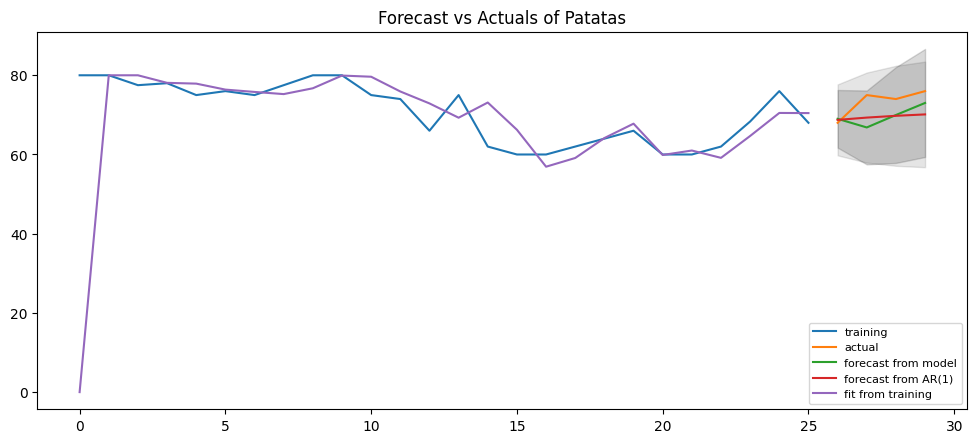

SELECTED MODEL: ARIMA(6, 1, 4)
RMSE Training: 16.14726964048653
RMSE Test: 4.821297713615975
Normalized RMSE Test: 0.0658197640084092
MAPE: 0.05438391748041093


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 4.619061270756136
Normalized RMSE Test: 0.06305885693865032
MAPE: 0.05530280687550285


In [103]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Patatas"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Pechay Baguio)

ARIMA(0, 0, 0). RMSE = 5.133940
ARIMA(0, 0, 1). RMSE = 4.101034
ARIMA(0, 0, 2). RMSE = 3.662798
ARIMA(0, 0, 3). RMSE = 3.656146
ARIMA(0, 0, 4). RMSE = 3.483851


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 5). RMSE = 3.483088
ARIMA(0, 0, 6). RMSE = 3.490999
ARIMA(1, 0, 1). RMSE = 3.605346
ARIMA(1, 0, 2). RMSE = 3.612203
ARIMA(1, 0, 3). RMSE = 3.634686
ARIMA(1, 0, 4). RMSE = 3.483040


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 5). RMSE = 3.468161
ARIMA(1, 0, 6). RMSE = 3.483738
ARIMA(2, 0, 0). RMSE = 3.611390
ARIMA(2, 0, 1). RMSE = 3.558837
ARIMA(2, 0, 2). RMSE = 3.369529
ARIMA(2, 0, 3). RMSE = 3.356041
ARIMA(2, 0, 4). RMSE = 3.428049
ARIMA(2, 0, 5). RMSE = 3.406051
ARIMA(2, 0, 6). RMSE = 3.405949
ARIMA(3, 0, 0). RMSE = 3.618443
ARIMA(3, 0, 1). RMSE = 3.436940
ARIMA(3, 0, 2). RMSE = 3.436702
ARIMA(3, 0, 3). RMSE = 3.368613
ARIMA(3, 0, 4). RMSE = 3.396758
ARIMA(3, 0, 5). RMSE = 3.371752
ARIMA(3, 0, 6). RMSE = 3.402295
ARIMA(4, 0, 0). RMSE = 3.603943
ARIMA(4, 0, 1). RMSE = 3.377609
ARIMA(4, 0, 2). RMSE = 3.415967
ARIMA(4, 0, 3). RMSE = 3.342801
ARIMA(4, 0, 4). RMSE = 3.345901
ARIMA(4, 0, 5). RMSE = 3.326195
ARIMA(4, 0, 6). RMSE = 3.307939
ARIMA(5, 0, 0). RMSE = 3.561455
ARIMA(5, 0, 1). RMSE = 3.358570
ARIMA(5, 0, 2). RMSE = 3.299361
ARIMA(5, 0, 3). RMSE = 3.358643
ARIMA(5, 0, 4). RMSE = 3.223867
ARIMA(5, 0, 5). RMSE = 3.244604
ARIMA(5, 0, 6). RMSE = 3.217662
ARIMA(6, 0, 0). RMSE = 3.530115
ARIMA(6,

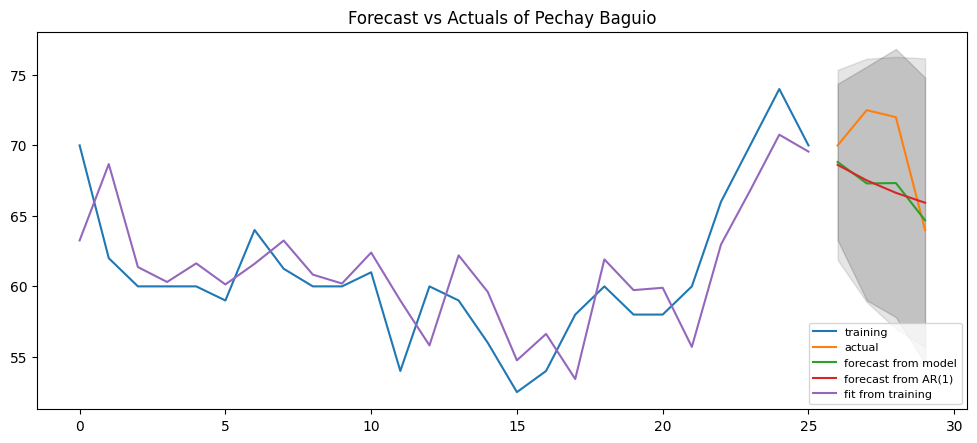

SELECTED MODEL: ARIMA(6, 0, 3)
RMSE Training: 3.197845531889505
RMSE Test: 3.5601740953481493
Normalized RMSE Test: 0.05113355971774721
MAPE: 0.0410235513614213


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 3.8482280130205684
Normalized RMSE Test: 0.05527077936115717
MAPE: 0.04828133042559614


In [104]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Pechay Baguio"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Chayote)

ARIMA(0, 0, 0). RMSE = 4.124720
ARIMA(0, 0, 1). RMSE = 2.616399
ARIMA(0, 0, 2). RMSE = 2.438941
ARIMA(0, 0, 3). RMSE = 2.397534


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 4). RMSE = 2.262427
ARIMA(0, 0, 5). RMSE = 2.125945
ARIMA(0, 0, 6). RMSE = 2.108929
ARIMA(1, 0, 1). RMSE = 2.359664
ARIMA(1, 0, 2). RMSE = 2.304278
ARIMA(1, 0, 3). RMSE = 2.279283
ARIMA(1, 0, 4). RMSE = 2.141598
ARIMA(1, 0, 5). RMSE = 2.112819


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 6). RMSE = 2.101685
ARIMA(2, 0, 0). RMSE = 2.632546
ARIMA(2, 0, 1). RMSE = 2.308276
ARIMA(2, 0, 2). RMSE = 2.297693
ARIMA(2, 0, 3). RMSE = 2.182206
ARIMA(2, 0, 4). RMSE = 2.118012
ARIMA(2, 0, 5). RMSE = 2.098750
ARIMA(2, 0, 6). RMSE = 2.115557
ARIMA(3, 0, 0). RMSE = 2.566029
ARIMA(3, 0, 1). RMSE = 2.280963
ARIMA(3, 0, 2). RMSE = 2.259948
ARIMA(3, 0, 3). RMSE = 2.120454
ARIMA(3, 0, 4). RMSE = 2.116222
ARIMA(3, 0, 5). RMSE = 2.114479
ARIMA(3, 0, 6). RMSE = 2.114468
ARIMA(4, 0, 0). RMSE = 2.308670
ARIMA(4, 0, 1). RMSE = 2.267993
ARIMA(4, 0, 2). RMSE = 2.187316
ARIMA(4, 0, 3). RMSE = 2.114835
ARIMA(4, 0, 4). RMSE = 2.074748
ARIMA(4, 0, 5). RMSE = 2.114265
ARIMA(4, 0, 6). RMSE = 2.113546
ARIMA(5, 0, 0). RMSE = 2.308745
ARIMA(5, 0, 1). RMSE = 2.203352
ARIMA(5, 0, 2). RMSE = 2.192893
ARIMA(5, 0, 3). RMSE = 2.114069
ARIMA(5, 0, 4). RMSE = 2.077685
ARIMA(5, 0, 5). RMSE = 2.091443
ARIMA(5, 0, 6). RMSE = 2.117975
ARIMA(6, 0, 0). RMSE = 2.301692
ARIMA(6, 0, 1). RMSE = 2.181367
ARIMA(6,

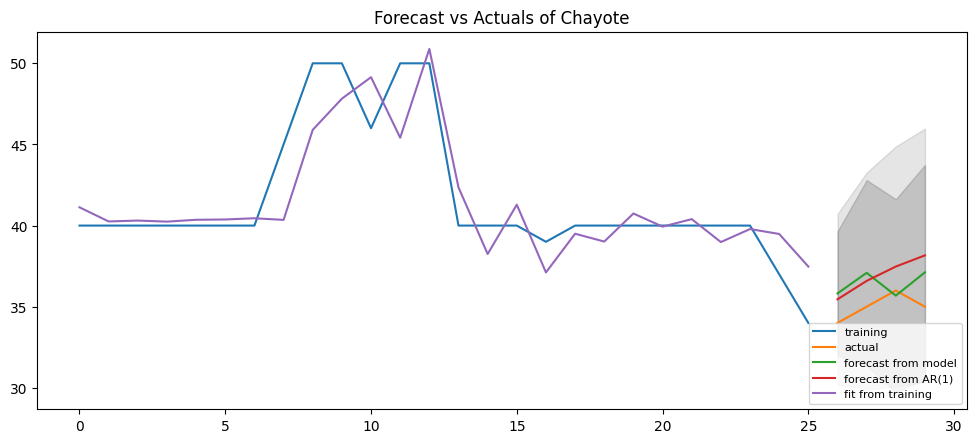

SELECTED MODEL: ARIMA(4, 0, 4)
RMSE Training: 2.0747475523123513
RMSE Test: 1.751496982198218
Normalized RMSE Test: 0.05004277091994909
MAPE: 0.04565673201352014


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 2.051335536159249
Normalized RMSE Test: 0.058609586747407114
MAPE: 0.054901299475200185


In [105]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Chayote"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Ampalaya)

ARIMA(0, 1, 0). RMSE = 19.593955
ARIMA(0, 1, 1). RMSE = 19.479362
ARIMA(0, 1, 2). RMSE = 18.794483


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 3). RMSE = 18.110189
ARIMA(0, 1, 4). RMSE = 17.869957
ARIMA(0, 1, 5). RMSE = 17.703071
ARIMA(0, 1, 6). RMSE = 17.700730
ARIMA(1, 1, 1). RMSE = 19.216424
ARIMA(1, 1, 2). RMSE = 18.751010
ARIMA(1, 1, 3). RMSE = 18.045208
ARIMA(1, 1, 4). RMSE = 17.746950
ARIMA(1, 1, 5). RMSE = 17.702926
ARIMA(1, 1, 6). RMSE = 17.705913
ARIMA(2, 1, 0). RMSE = 18.491113
ARIMA(2, 1, 1). RMSE = 18.256297
ARIMA(2, 1, 2). RMSE = 18.135420
ARIMA(2, 1, 3). RMSE = 18.135086
ARIMA(2, 1, 4). RMSE = 17.650033
ARIMA(2, 1, 5). RMSE = 17.682103
ARIMA(2, 1, 6). RMSE = 17.592835
ARIMA(3, 1, 0). RMSE = 18.093923
ARIMA(3, 1, 1). RMSE = 18.036126
ARIMA(3, 1, 2). RMSE = 18.033063
ARIMA(3, 1, 3). RMSE = 17.779285
ARIMA(3, 1, 4). RMSE = 17.596856


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 5). RMSE = 17.590773
ARIMA(3, 1, 6). RMSE = 17.590283
ARIMA(4, 1, 0). RMSE = 18.040912
ARIMA(4, 1, 1). RMSE = 18.034089
ARIMA(4, 1, 2). RMSE = 18.012546
ARIMA(4, 1, 3). RMSE = 17.708491
ARIMA(4, 1, 4). RMSE = 17.594604
ARIMA(4, 1, 5). RMSE = 17.602781
ARIMA(4, 1, 6). RMSE = 17.596651
ARIMA(5, 1, 0). RMSE = 18.035769
ARIMA(5, 1, 1). RMSE = 18.033052
ARIMA(5, 1, 2). RMSE = 18.016298
ARIMA(5, 1, 3). RMSE = 17.714280
ARIMA(5, 1, 4). RMSE = 17.597684
ARIMA(5, 1, 5). RMSE = 17.588475
ARIMA(5, 1, 6). RMSE = 17.590505
ARIMA(6, 1, 0). RMSE = 18.005242
ARIMA(6, 1, 1). RMSE = 17.937937
ARIMA(6, 1, 2). RMSE = 17.908457
ARIMA(6, 1, 3). RMSE = 17.701510
ARIMA(6, 1, 4). RMSE = 17.598609
ARIMA(6, 1, 5). RMSE = 17.593238
ARIMA(6, 1, 6). RMSE = 17.529440
Optimal p: 6
Optimal d: 1
Optimal q: 6


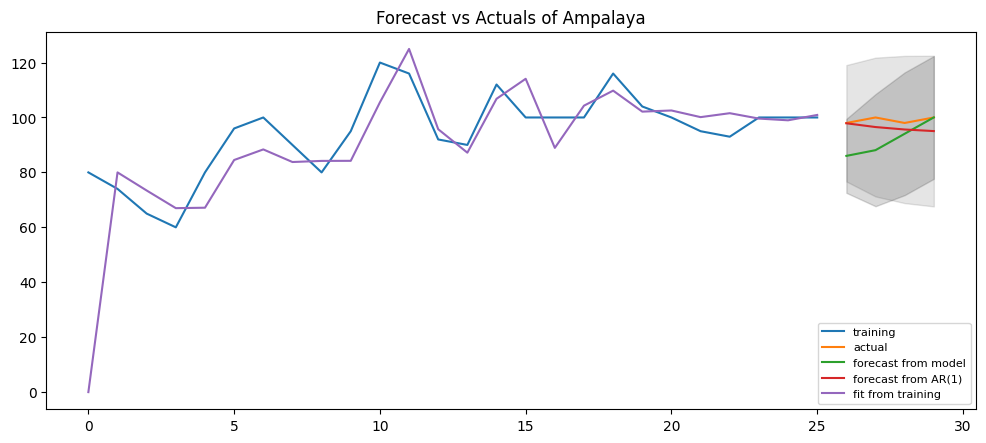

SELECTED MODEL: ARIMA(6, 1, 6)
RMSE Training: 17.529439954180116
RMSE Test: 8.669900460800394
Normalized RMSE Test: 0.0875747521292969
MAPE: 0.0704061457310102


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 3.254487532045545
Normalized RMSE Test: 0.03287361143480349
MAPE: 0.02745399010545934


In [106]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Ampalaya"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Sitao)

ARIMA(0, 0, 0). RMSE = 13.797524
ARIMA(0, 0, 1). RMSE = 10.207617
ARIMA(0, 0, 2). RMSE = 8.825623
ARIMA(0, 0, 3). RMSE = 8.652103
ARIMA(0, 0, 4). RMSE = 8.650552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 5). RMSE = 7.599991
ARIMA(0, 0, 6). RMSE = 7.457662
ARIMA(1, 0, 1). RMSE = 8.290170
ARIMA(1, 0, 2). RMSE = 8.281774
ARIMA(1, 0, 3). RMSE = 8.213940
ARIMA(1, 0, 4). RMSE = 7.478468
ARIMA(1, 0, 5). RMSE = 7.238335


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 6). RMSE = 7.223564
ARIMA(2, 0, 0). RMSE = 8.290648
ARIMA(2, 0, 1). RMSE = 8.286816
ARIMA(2, 0, 2). RMSE = 8.290273
ARIMA(2, 0, 3). RMSE = 7.666589
ARIMA(2, 0, 4). RMSE = 7.371150
ARIMA(2, 0, 5). RMSE = 7.224132
ARIMA(2, 0, 6). RMSE = 7.559484
ARIMA(3, 0, 0). RMSE = 8.273955
ARIMA(3, 0, 1). RMSE = 8.273953
ARIMA(3, 0, 2). RMSE = 7.971418
ARIMA(3, 0, 3). RMSE = 7.647000
ARIMA(3, 0, 4). RMSE = 7.110450
ARIMA(3, 0, 5). RMSE = 7.223697
ARIMA(3, 0, 6). RMSE = 7.598809
ARIMA(4, 0, 0). RMSE = 8.275368
ARIMA(4, 0, 1). RMSE = 8.235684
ARIMA(4, 0, 2). RMSE = 7.862981
ARIMA(4, 0, 3). RMSE = 6.875263
ARIMA(4, 0, 4). RMSE = 6.708583
ARIMA(4, 0, 5). RMSE = 6.638511
ARIMA(4, 0, 6). RMSE = 7.596841
ARIMA(5, 0, 0). RMSE = 7.796478
ARIMA(5, 0, 1). RMSE = 6.967951
ARIMA(5, 0, 2). RMSE = 6.986897
ARIMA(5, 0, 3). RMSE = 6.633214
ARIMA(5, 0, 4). RMSE = 6.631973
ARIMA(5, 0, 5). RMSE = 6.741640
ARIMA(5, 0, 6). RMSE = 7.413770
ARIMA(6, 0, 0). RMSE = 6.824558
ARIMA(6, 0, 1). RMSE = 6.821162
ARIMA(6,

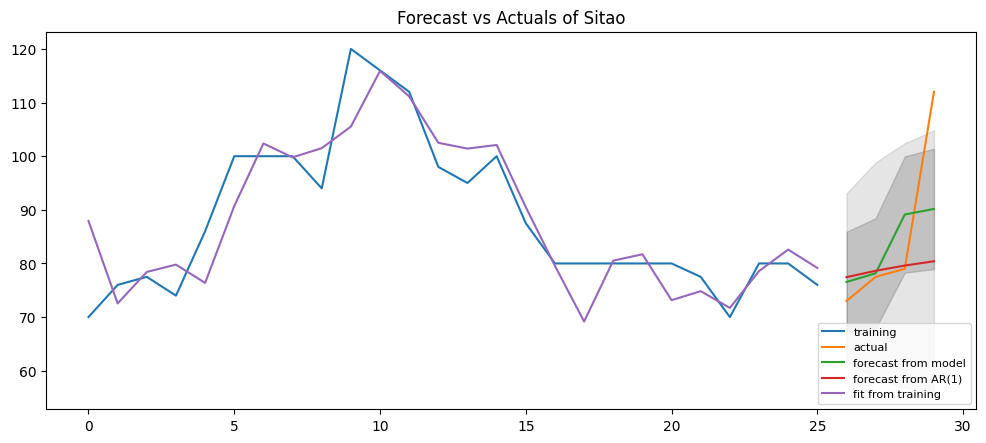

SELECTED MODEL: ARIMA(6, 0, 6)
RMSE Training: 6.473329520476786
RMSE Test: 12.169650100619707
Normalized RMSE Test: 0.14254348580520887
MAPE: 0.09507915115343786


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 15.963647535149248
Normalized RMSE Test: 0.18698269440877596
MAPE: 0.09130816001004129


In [107]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Sitao"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Pechay Tagalog)

ARIMA(0, 0, 0). RMSE = 5.648218
ARIMA(0, 0, 1). RMSE = 4.087686
ARIMA(0, 0, 2). RMSE = 3.774315
ARIMA(0, 0, 3). RMSE = 3.671406
ARIMA(0, 0, 4). RMSE = 3.647658


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 5). RMSE = 3.591637
ARIMA(0, 0, 6). RMSE = 3.193053
ARIMA(1, 0, 1). RMSE = 3.767500
ARIMA(1, 0, 2). RMSE = 3.715811
ARIMA(1, 0, 3). RMSE = 3.622162
ARIMA(1, 0, 4). RMSE = 3.465208


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 5). RMSE = 3.463218
ARIMA(1, 0, 6). RMSE = 3.157876
ARIMA(2, 0, 0). RMSE = 3.662820
ARIMA(2, 0, 1). RMSE = 3.290073
ARIMA(2, 0, 2). RMSE = 3.288962
ARIMA(2, 0, 3). RMSE = 3.284144
ARIMA(2, 0, 4). RMSE = 3.239079
ARIMA(2, 0, 5). RMSE = 3.220376
ARIMA(2, 0, 6). RMSE = 3.149784
ARIMA(3, 0, 0). RMSE = 3.583886
ARIMA(3, 0, 1). RMSE = 3.289131
ARIMA(3, 0, 2). RMSE = 3.222010
ARIMA(3, 0, 3). RMSE = 3.217827
ARIMA(3, 0, 4). RMSE = 3.217876
ARIMA(3, 0, 5). RMSE = 3.129754
ARIMA(3, 0, 6). RMSE = 3.071386
ARIMA(4, 0, 0). RMSE = 3.518059
ARIMA(4, 0, 1). RMSE = 3.478500
ARIMA(4, 0, 2). RMSE = 3.217754
ARIMA(4, 0, 3). RMSE = 3.208026
ARIMA(4, 0, 4). RMSE = 3.183795
ARIMA(4, 0, 5). RMSE = 3.026565
ARIMA(4, 0, 6). RMSE = 3.069096
ARIMA(5, 0, 0). RMSE = 3.486770
ARIMA(5, 0, 1). RMSE = 3.278055
ARIMA(5, 0, 2). RMSE = 3.217409
ARIMA(5, 0, 3). RMSE = 3.180287
ARIMA(5, 0, 4). RMSE = 3.134135
ARIMA(5, 0, 5). RMSE = 3.113110
ARIMA(5, 0, 6). RMSE = 3.054362
ARIMA(6, 0, 0). RMSE = 3.405044
ARIMA(6,

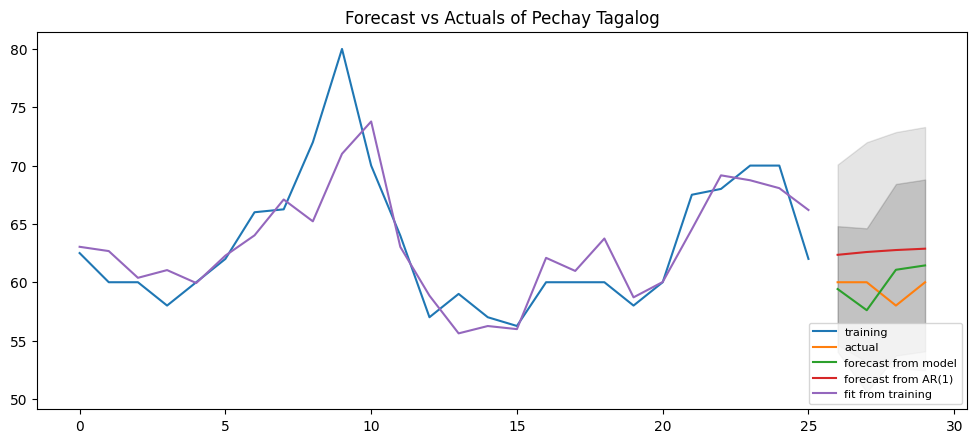

SELECTED MODEL: ARIMA(6, 0, 6)
RMSE Training: 2.9866110471365714
RMSE Test: 2.097024295592631
Normalized RMSE Test: 0.03524410580827951
MAPE: 0.031656106727227844


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 3.2853352705420487
Normalized RMSE Test: 0.055215718832639475
MAPE: 0.05309533296330336


In [108]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Pechay Tagalog"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Squash)

ARIMA(0, 1, 0). RMSE = 8.135104
ARIMA(0, 1, 1). RMSE = 8.133330
ARIMA(0, 1, 2). RMSE = 8.129687
ARIMA(0, 1, 3). RMSE = 8.111552
ARIMA(0, 1, 4). RMSE = 8.108955
ARIMA(0, 1, 5). RMSE = 8.108965


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 6). RMSE = 8.102015
ARIMA(1, 1, 1). RMSE = 8.111144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 1, 2). RMSE = 8.109770
ARIMA(1, 1, 3). RMSE = 8.108064
ARIMA(1, 1, 4). RMSE = 8.107427
ARIMA(1, 1, 5). RMSE = 8.108585
ARIMA(1, 1, 6). RMSE = 8.101349
ARIMA(2, 1, 0). RMSE = 8.131771
ARIMA(2, 1, 1). RMSE = 8.109525
ARIMA(2, 1, 2). RMSE = 8.110695
ARIMA(2, 1, 3). RMSE = 8.107674
ARIMA(2, 1, 4). RMSE = 8.107426
ARIMA(2, 1, 5). RMSE = 8.105603
ARIMA(2, 1, 6). RMSE = 8.070216
ARIMA(3, 1, 0). RMSE = 8.123756
ARIMA(3, 1, 1). RMSE = 8.108563
ARIMA(3, 1, 2). RMSE = 8.108213
ARIMA(3, 1, 3). RMSE = 8.090020
ARIMA(3, 1, 4). RMSE = 8.081692
ARIMA(3, 1, 5). RMSE = 8.081237
ARIMA(3, 1, 6). RMSE = 8.070291
ARIMA(4, 1, 0). RMSE = 8.122611
ARIMA(4, 1, 1). RMSE = 8.108205
ARIMA(4, 1, 2). RMSE = 8.107959
ARIMA(4, 1, 3). RMSE = 8.089980
ARIMA(4, 1, 4). RMSE = 8.088529
ARIMA(4, 1, 5). RMSE = 8.088043
ARIMA(4, 1, 6). RMSE = 8.071036
ARIMA(5, 1, 0). RMSE = 8.122347
ARIMA(5, 1, 1). RMSE = 8.107313
ARIMA(5, 1, 2). RMSE = 8.107138
ARIMA(5, 1, 3). RMSE = 8.089767
ARIMA(5, 1, 4). RMSE = 8.087836
ARIMA(5,

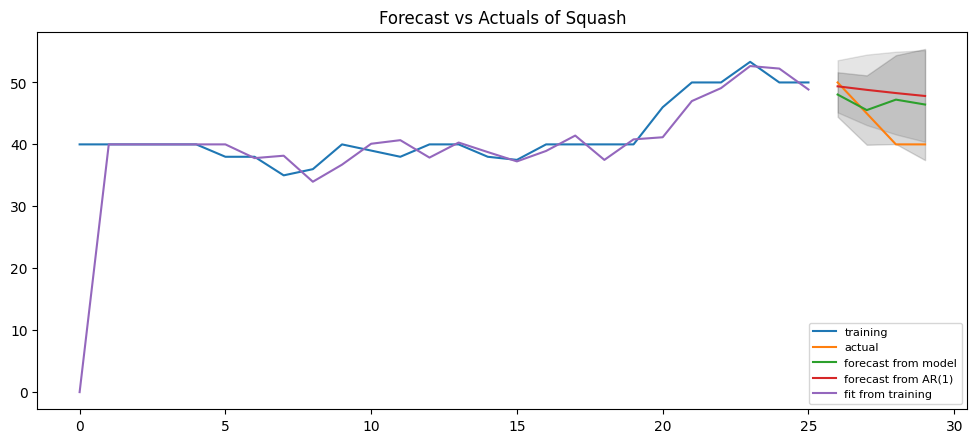

SELECTED MODEL: ARIMA(5, 1, 6)
RMSE Training: 8.069118284867947
RMSE Test: 4.943020577279504
Normalized RMSE Test: 0.11298332748067437
MAPE: 0.09813521718876111


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 6.01271908157275
Normalized RMSE Test: 0.13743357900737715
MAPE: 0.12490166036071795


In [109]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Squash"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Eggplant)

ARIMA(0, 0, 0). RMSE = 12.741507
ARIMA(0, 0, 1). RMSE = 10.098155
ARIMA(0, 0, 2). RMSE = 8.580661


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 3). RMSE = 8.600950
ARIMA(0, 0, 4). RMSE = 8.587867
ARIMA(0, 0, 5). RMSE = 8.534883
ARIMA(0, 0, 6). RMSE = 8.534699
ARIMA(1, 0, 1). RMSE = 9.605276
ARIMA(1, 0, 2). RMSE = 8.610577
ARIMA(1, 0, 3). RMSE = 8.617946
ARIMA(1, 0, 4). RMSE = 8.541567


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 5). RMSE = 8.538228
ARIMA(1, 0, 6). RMSE = 8.448271
ARIMA(2, 0, 0). RMSE = 9.169823
ARIMA(2, 0, 1). RMSE = 9.165521
ARIMA(2, 0, 2). RMSE = 8.566986
ARIMA(2, 0, 3). RMSE = 8.530194
ARIMA(2, 0, 4). RMSE = 8.189590
ARIMA(2, 0, 5). RMSE = 8.196398
ARIMA(2, 0, 6). RMSE = 8.346839
ARIMA(3, 0, 0). RMSE = 9.158913
ARIMA(3, 0, 1). RMSE = 8.961246
ARIMA(3, 0, 2). RMSE = 8.472657
ARIMA(3, 0, 3). RMSE = 8.452960
ARIMA(3, 0, 4). RMSE = 8.300363
ARIMA(3, 0, 5). RMSE = 8.151895
ARIMA(3, 0, 6). RMSE = 8.379652
ARIMA(4, 0, 0). RMSE = 8.614231
ARIMA(4, 0, 1). RMSE = 8.441655
ARIMA(4, 0, 2). RMSE = 8.440379
ARIMA(4, 0, 3). RMSE = 8.358037
ARIMA(4, 0, 4). RMSE = 8.205189
ARIMA(4, 0, 5). RMSE = 8.229733
ARIMA(4, 0, 6). RMSE = 8.221288
ARIMA(5, 0, 0). RMSE = 8.546630
ARIMA(5, 0, 1). RMSE = 8.442764
ARIMA(5, 0, 2). RMSE = 8.398737
ARIMA(5, 0, 3). RMSE = 8.408656
ARIMA(5, 0, 4). RMSE = 8.088473
ARIMA(5, 0, 5). RMSE = 8.219597
ARIMA(5, 0, 6). RMSE = 8.204841
ARIMA(6, 0, 0). RMSE = 8.426376
ARIMA(6,

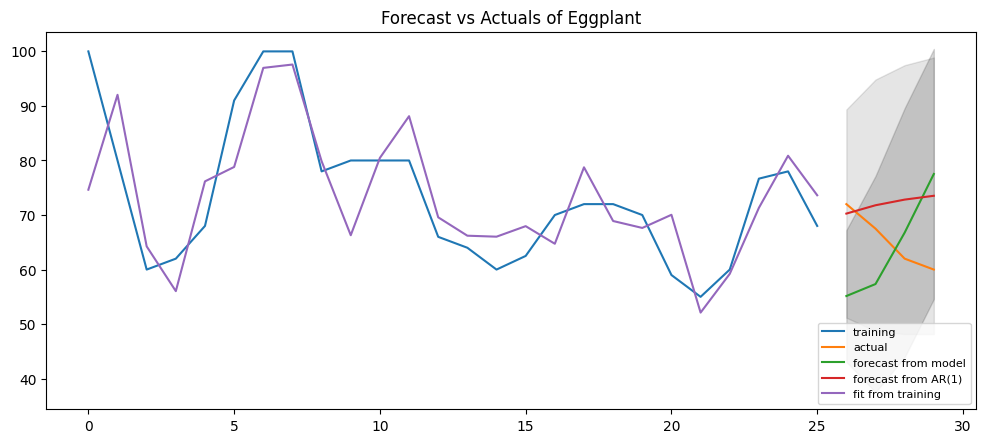

SELECTED MODEL: ARIMA(5, 0, 4)
RMSE Training: 8.088472706740497
RMSE Test: 13.388110417483366
Normalized RMSE Test: 0.204789451892671
MAPE: 0.18838540123244152


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 8.968034113814806
Normalized RMSE Test: 0.1371783420851213
MAPE: 0.12196126368801219


In [110]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Eggplant"

ModelAndForecast(fixed_query)

### ARIMA Modeling (Tomato)

ARIMA(0, 1, 0). RMSE = 15.008841
ARIMA(0, 1, 1). RMSE = 15.005880
ARIMA(0, 1, 2). RMSE = 14.992746
ARIMA(0, 1, 3). RMSE = 14.498135
ARIMA(0, 1, 4). RMSE = 14.103081
ARIMA(0, 1, 5). RMSE = 14.002261


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 6). RMSE = 14.017492
ARIMA(1, 1, 1). RMSE = 14.989586
ARIMA(1, 1, 2). RMSE = 14.975103


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 1, 3). RMSE = 14.456629
ARIMA(1, 1, 4). RMSE = 14.150864
ARIMA(1, 1, 5). RMSE = 14.076845
ARIMA(1, 1, 6). RMSE = 15.008841
ARIMA(2, 1, 0). RMSE = 14.993996
ARIMA(2, 1, 1). RMSE = 14.950623
ARIMA(2, 1, 2). RMSE = 14.592398
ARIMA(2, 1, 3). RMSE = 14.396683
ARIMA(2, 1, 4). RMSE = 13.912460
ARIMA(2, 1, 5). RMSE = 13.849818
ARIMA(2, 1, 6). RMSE = 15.008841
ARIMA(3, 1, 0). RMSE = 14.627727
ARIMA(3, 1, 1). RMSE = 14.509230
ARIMA(3, 1, 2). RMSE = 14.420888
ARIMA(3, 1, 3). RMSE = 14.294191
ARIMA(3, 1, 4). RMSE = 14.275358
ARIMA(3, 1, 5). RMSE = 13.884176
ARIMA(3, 1, 6). RMSE = 15.008840
ARIMA(4, 1, 0). RMSE = 14.455683
ARIMA(4, 1, 1). RMSE = 14.286480
ARIMA(4, 1, 2). RMSE = 13.969526
ARIMA(4, 1, 3). RMSE = 13.844503
ARIMA(4, 1, 4). RMSE = 13.847014
ARIMA(4, 1, 5). RMSE = 13.785695
ARIMA(4, 1, 6). RMSE = 13.390913
ARIMA(5, 1, 0). RMSE = 14.310303
ARIMA(5, 1, 1). RMSE = 14.224018
ARIMA(5, 1, 2). RMSE = 13.864725
ARIMA(5, 1, 3). RMSE = 13.848366
ARIMA(5, 1, 4). RMSE = 13.564463
ARIMA(5, 1

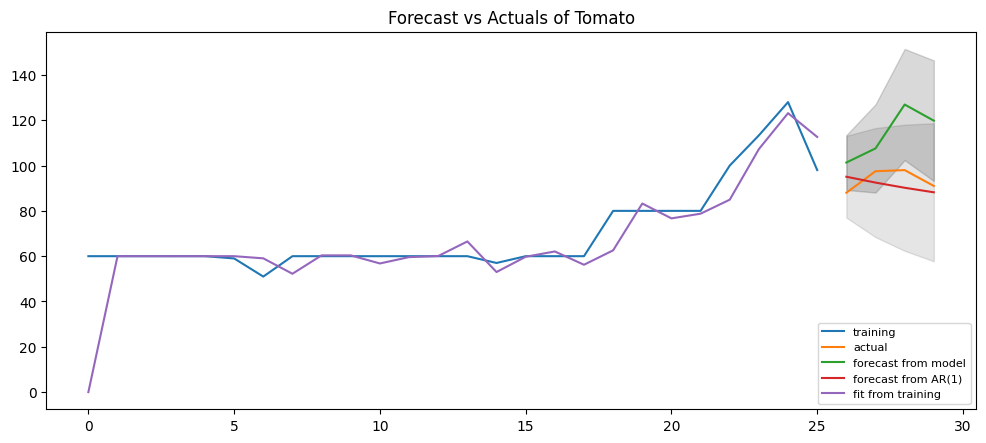

SELECTED MODEL: ARIMA(6, 1, 4)
RMSE Training: 13.360521196583166
RMSE Test: 22.060195642458158
Normalized RMSE Test: 0.23562291740943292
MAPE: 0.21667412425055932


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 5.995193659610827
Normalized RMSE Test: 0.06403411118409427
MAPE: 0.06053366156861462


In [111]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

fixed_query = "Tomato"

ModelAndForecast(fixed_query)

### ARIMA Modeling (With Query)

Cabbage
ARIMA(0, 2, 0). RMSE = 26.883576
ARIMA(0, 2, 1). RMSE = 26.712539
ARIMA(0, 2, 2). RMSE = 26.710444
ARIMA(0, 2, 3). RMSE = 26.709773
ARIMA(0, 2, 4). RMSE = 26.898474


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 5). RMSE = 26.691928


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ARIMA(0, 2, 6). RMSE = nan
ARIMA(1, 2, 1). RMSE = 26.710445
ARIMA(1, 2, 2). RMSE = 26.706935
ARIMA(1, 2, 3). RMSE = 26.710428
ARIMA(1, 2, 4). RMSE = 26.742384
ARIMA(1, 2, 5). RMSE = 26.655057
ARIMA(2, 2, 0). RMSE = 26.706385
ARIMA(2, 2, 1). RMSE = 26.706229
ARIMA(2, 2, 2). RMSE = 26.706784
ARIMA(2, 2, 3). RMSE = 26.683357
ARIMA(2, 2, 4). RMSE = 26.673597
ARIMA(2, 2, 5). RMSE = 26.642070
ARIMA(3, 2, 0). RMSE = 26.706066
ARIMA(3, 2, 1). RMSE = 26.701863


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 2, 2). RMSE = 26.701729
ARIMA(3, 2, 3). RMSE = 26.656949
ARIMA(3, 2, 4). RMSE = 26.670646
ARIMA(3, 2, 5). RMSE = 26.639984
ARIMA(4, 2, 0). RMSE = 26.696612
ARIMA(4, 2, 1). RMSE = 26.687545
ARIMA(4, 2, 2). RMSE = 26.696014
ARIMA(4, 2, 3). RMSE = 26.654570
ARIMA(4, 2, 4). RMSE = 26.656067
ARIMA(4, 2, 5). RMSE = 26.639120
ARIMA(5, 2, 0). RMSE = 26.680415
ARIMA(5, 2, 1). RMSE = 26.677978
ARIMA(5, 2, 2). RMSE = 26.691833
ARIMA(5, 2, 3). RMSE = 26.665460
ARIMA(5, 2, 4). RMSE = 26.637649
ARIMA(5, 2, 5). RMSE = 26.651289
ARIMA(6, 2, 0). RMSE = 26.677171
ARIMA(6, 2, 1). RMSE = 26.676721
ARIMA(6, 2, 2). RMSE = 26.620634
ARIMA(6, 2, 3). RMSE = 26.619088
ARIMA(6, 2, 4). RMSE = 26.619261
ARIMA(6, 2, 5). RMSE = 26.642891
Optimal p: 6
Optimal d: 2
Optimal q: 3


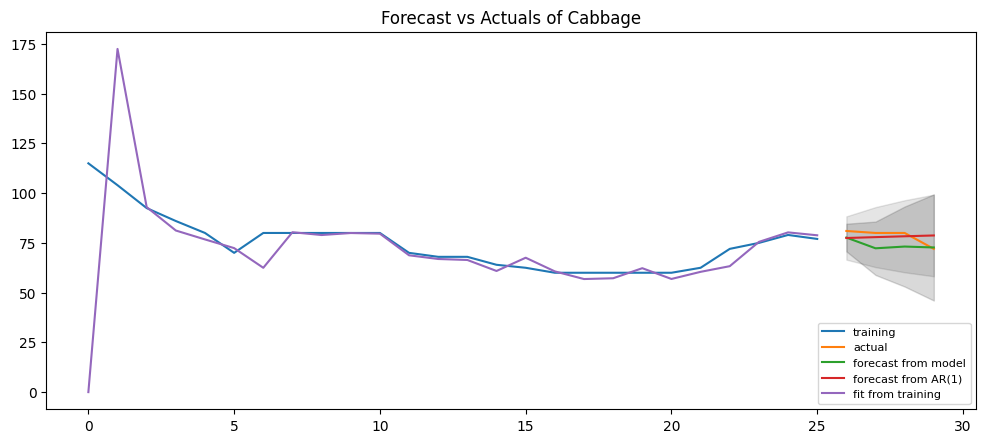

SELECTED MODEL: ARIMA(6, 2, 3)
RMSE Training: 26.61908770634136
RMSE Test: 5.421198415378795
Normalized RMSE Test: 0.06928049093135841
MAPE: 0.05813639707154445


COMPARED MODEL: ARIMA(1, 0, 0)
RMSE Test: 4.035318788457066
Normalized RMSE Test: 0.05156956918155995
MAPE: 0.046078526788169115


In [112]:
# Filter out ConvergenceWarnings. Optional part of code, just to reduce text in the terminal output
warnings.simplefilter('ignore', ConvergenceWarning)

# Get user input. User input should be limited to only the vegetables available in the data set.
query = str.split(input(), " ")
fixed_query = ""

# Fix query into something readable by the program. (Capital first letter, lowercase every other letter per word)
for word in query:
  fixed_query += word[0].upper() + word[1:].lower() + " "
fixed_query = fixed_query[:-1]

ModelAndForecast(fixed_query)